<a href="https://colab.research.google.com/github/rswatsch/MAT421_RyanS/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation Continued Homework #3
**Lagrange Polynomial Interpolation and Newton's Polynomial Interpolation methods**

In this assignment I will demonstrate my understanding of two more interpolation methods


In [25]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-25-f07c949af95f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Using my own data points and the given function from the notes we can prove that Pi=(xj) when i=j and Pi(xj)=0 when i doesnt equal j.

x = [0, 1, 2]
y = [5, 2, 4]

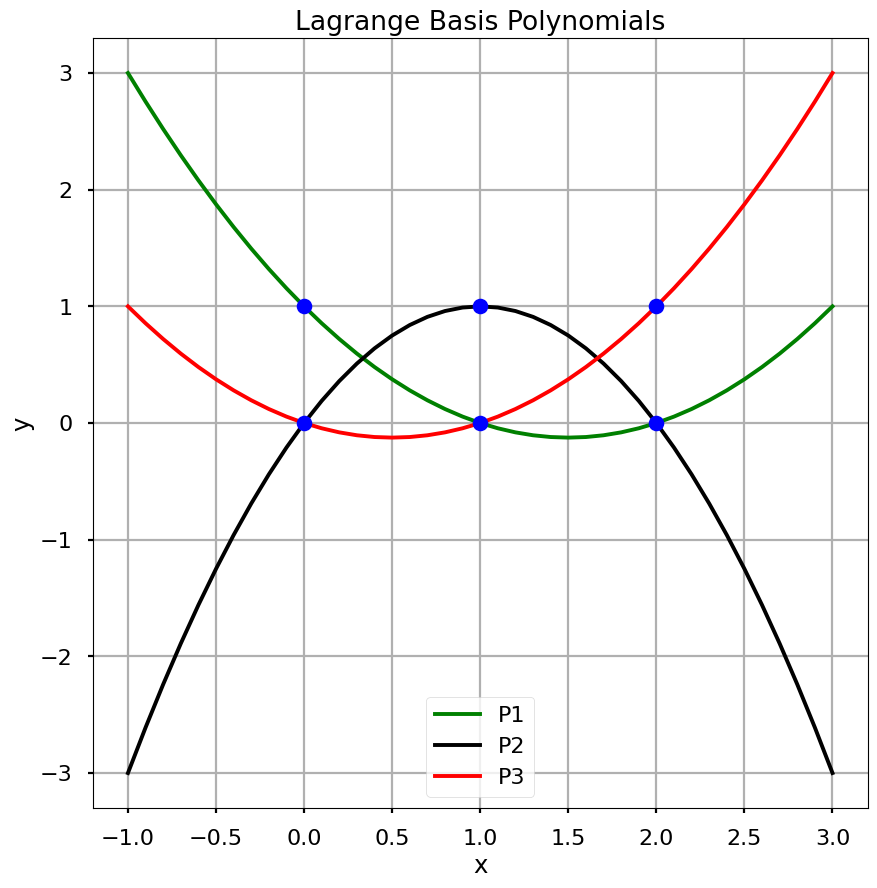

In [51]:
x = [0, 1, 2]
y = [5, 2, 4]

P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,10))

plt.plot(x_new, P1(x_new), 'g', label = 'P1')
plt.plot(x_new, P2(x_new), 'k', label = 'P2')
plt.plot(x_new, P3(x_new), 'r', label = 'P3')
plt.plot(x, np.ones(len(x)), 'bo', x, np.zeros(len(x)), 'bo')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


# Lagrange Polynomial Interpolation 17.4


Lagrange Polynomials are different from the previous interpolation methods in that they find a singular polynomial that runs through all the points/numbers being specified

For the example that follows we are graphing the lagrange polynomial to verify that it does inteed hit every data point.

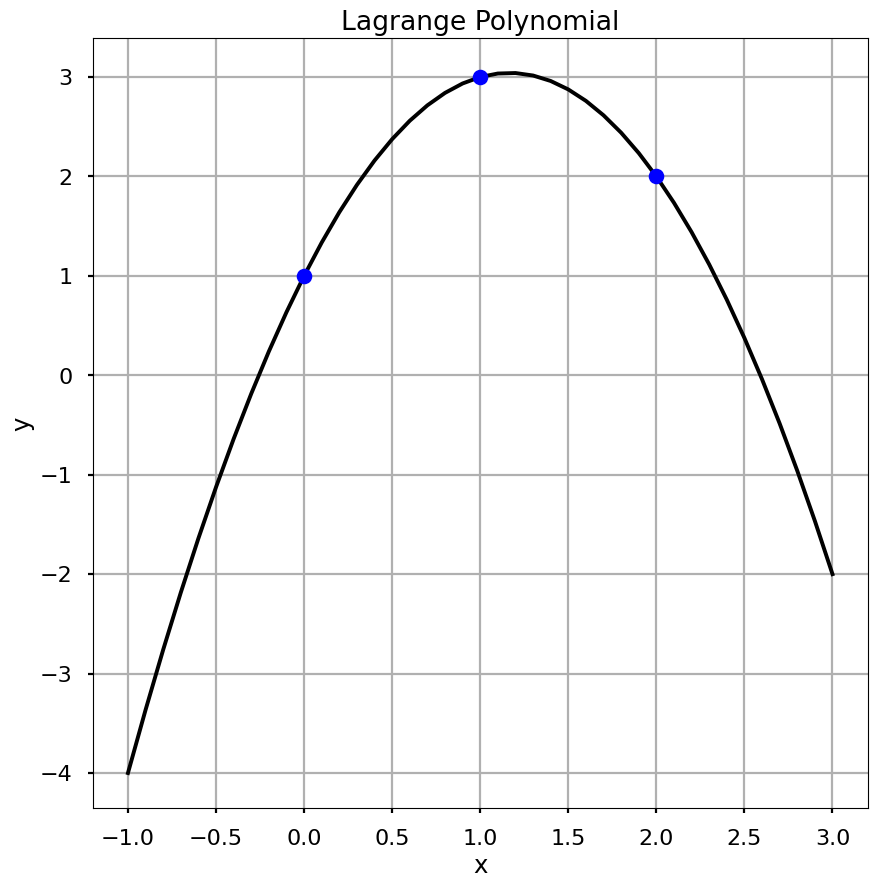

In [32]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,10))

plt.plot(x_new, L(x_new), 'k', x, y, 'bo')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using the same data but instead utilizing a scipy which directly interpolates the data as opposed to using a preset function/given.

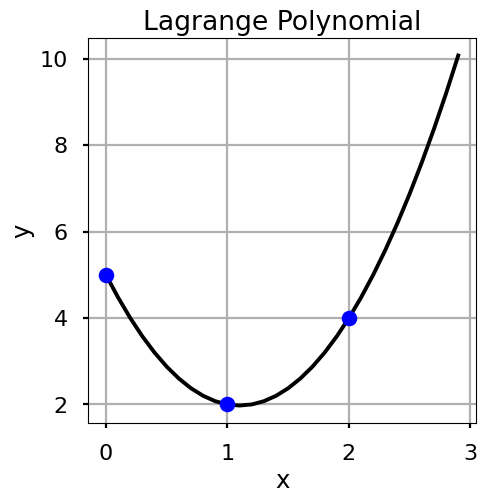

In [55]:
from scipy.interpolate import lagrange

x = [0, 1, 2]
y = [5, 2, 4]


x_new = np.arange(0, 3, 0.1)

f = lagrange(x, y)
fig = plt.figure(figsize = (5,5))
plt.plot(x_new, f(x_new), 'k', x, y, 'bo')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Newton's Polynomial Interpolation Method 17.5

In this section we are to understand the innerworkings behind netwon's polynomial interpolation method.


Newton's polynomial interpolation method is another common technique to find an exact set of data points.

For the following example, I plan to use the following data for my divided differences table

**x =[-12, -5, 0, 3]
y =[-5, 2, 6, 4]**


In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

<ipython-input-62-92e0d41b322d>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Essentially, what is occuring in this next set of code is setting up and actually preforming the divided difference between x,y. The notes explained that newtons method is using matrixes and iteration to simplify down to our final answer. Computers can do this much faster than us by had when it is complex.

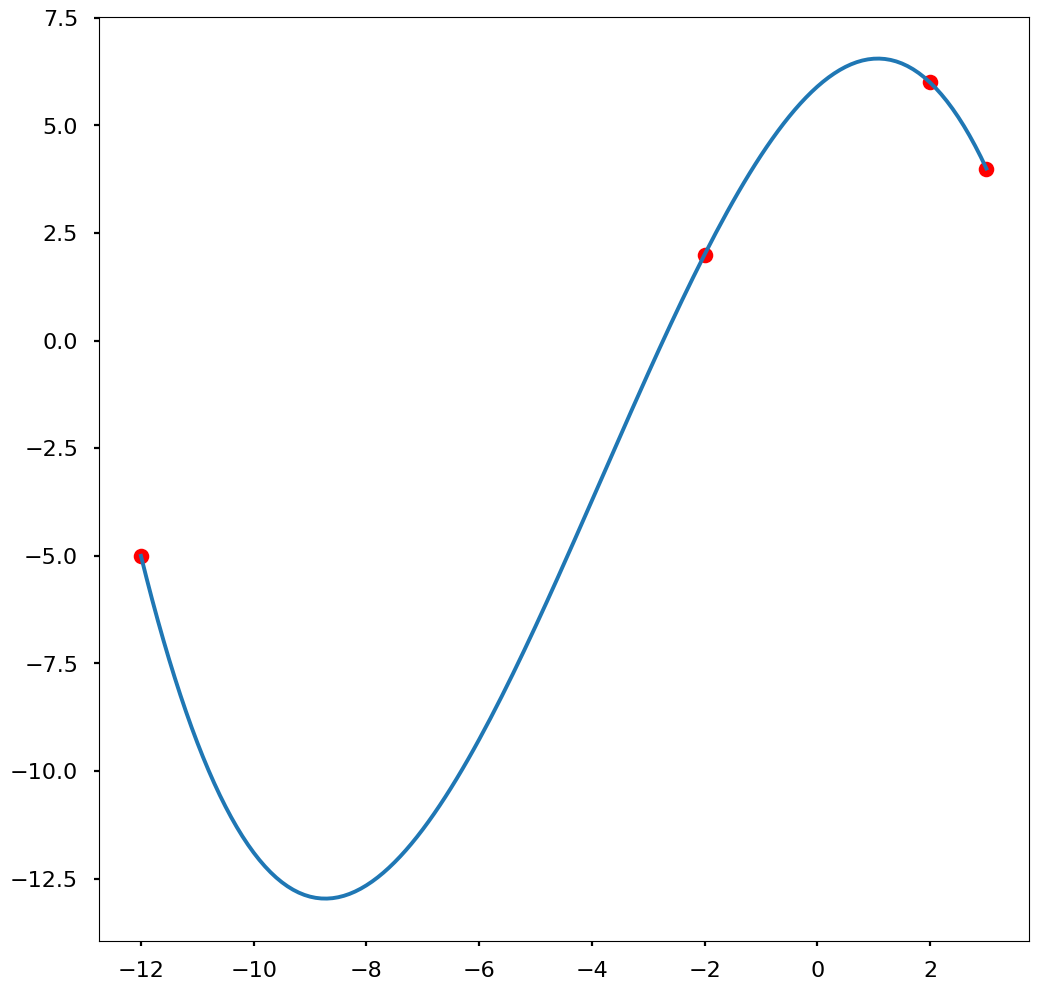

In [72]:

def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
      for i in range(n-j):
        coef[i][j] = \
         (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-12, -2, 2, 3])
y = np.array([-5, 2, 6, 4])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-12, 3.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 12))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)